# Overview

In this project, I am a Data Scientist contractor working with different Women's Fashion Brands, such as Zara and H&M, to classify comments as negative or positive. This project aims to create a generalizable classification model that can be fed comments from any platform, such as Twitter, Instagram, or blogs. For demonstration purposes, I will utilize my model to classify tweets as positive or negative so the customer service teams can respond appropriately, such as responding to customer concerns in negative tweets and retweeting positive tweets.

# Business Understanding

Natural language processing (NLP) has proved to be a highly effective technology for companies to save time and money while optimizing business processes. One of the major benefits of natural language processing for businesses is the ability to process massive volumes of text across various outlets, such as social media platforms, blogs, comments, and so on. By utilizing a machine learning model to classify text as positive or negative, businesses can send the comments to the appropriate teams, such as Quality Assurance for negative comments or Marketing for positive comments. Generalizability is important with the constant evolution of technology, social media, and how users choose to interact with products and brands. While one brand may receive lots of tweets, another brand may be discussed more in the comments of their Instagram posts.

## Use Cases

Positive Comments
- Retweet or repost from the Brand account
- Respond to boost that comment and reach more viewers
- Identify positive trends, such as colors or fit types, that multiple users are responding to
- Improve brand loyalty

Negative Comments
- Respond to help customers feel heard and solve any fixable issues
- Identify issues with items before next drops, such as colors not photographing accurately on website or quality issues with fabric
- Improve brand loyalty 

## Why utilize data from reviews?

Reviews left by customers contain both text reviews (the meat of the review) in conjunction with a rating. By utilizing reviews as my source, I am able to easily assign a label of Positive_Rating (0 being false, 1 being true) to the review text based on the rating. This helps my model learn what words are associated with a positive sentiment and what words may be more associated with a negative sentiment. I can then apply this model to texts that are not accompanied by a number rating, such as tweets, Instagram captions, blog posts, and more.

# Data

Data for this project was pulled from a compiled dataset of Women's E-Commerce Clothing Reviews compiled in one CSV file. 

The review data contained 23,486 reviews. Additional variables included Clothing ID, Age, Title (of the review if there was one), Review Text, Rating, Recommended IND (whether or not the customer recommends a product), Positive Feedback Count (number of other customers who found the review positive), Division Name (categorical name of product high-level division), Department Name, and Class Name. Reviews ranged on a scale of 1-5. A majority of reviews received an overall rating of 5, which could be a limitation to the model.

In [1]:
#All necessary imports for modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#Required prediction modelling libraries are imported
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, precision_score, precision_recall_fscore_support, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost
from xgboost import XGBClassifier

import pickle
import json


In [3]:
#Reading in final dataset

In [4]:
df = pd.read_csv('./data/final_data.csv')

In [5]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating,Clean,String,Polarity_Clean,Subjective_Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,1,"['love', 'dress', 'sooo', 'pretty', 'happened'...",love dress sooo pretty happened find store gla...,0.318750,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,0,"['high', 'hope', 'dress', 'really', 'wanted', ...",high hope dress really wanted work initially o...,0.079865,0.349762
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,1,"['shirt', 'very', 'flattering', 'due', 'adjust...",shirt very flattering due adjustable front tie...,0.393750,0.568750


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing_ID              22640 non-null  int64  
 1   Age                      22640 non-null  int64  
 2   Title                    19675 non-null  object 
 3   Review_Text              22640 non-null  object 
 4   Rating                   22640 non-null  int64  
 5   Recommended_IND          22640 non-null  int64  
 6   Positive_Feedback_Count  22640 non-null  int64  
 7   Division_Name            22627 non-null  object 
 8   Department Name          22627 non-null  object 
 9   Class_Name               22627 non-null  object 
 10  Polarity                 22640 non-null  float64
 11  Subjective               22640 non-null  float64
 12  Positive_Rating          22640 non-null  int64  
 13  Clean                    22640 non-null  object 
 14  String                

In [7]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Polarity                      0
Subjective                    0
Positive_Rating               0
Clean                         0
String                        0
Polarity_Clean                0
Subjective_Clean              0
dtype: int64

In [8]:
#Confimring no nulls in String column

# Modeling

### Train-Test Split With df

In [9]:
# Specify X as the cleaned strings in df and y as the target-Positive_Rating.
X = df['String']
y = df['Positive_Rating']

In [10]:
#Performed the train-test split, using 20% for the hold-out data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20)

In [11]:
X_train

19805                   love contrast much prettier person
11396    top look better hanger looking feminine plaid ...
7884     much question whether love pant several pair p...
21304    legging warm comfortable thick enough wear pan...
7216                     much lower quality robe purchased
                               ...                        
11964    bought grey gorgeous color like long length ar...
21575    dress really pretty fun see dress tone subtle ...
5390     bought one tee washed time luckily hole yet li...
860      excited see jean since came petite size short ...
15795              bought sweater love one favorite season
Name: String, Length: 18112, dtype: object

### Visually inspecting vecorized data

In [12]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train)
X_train_vectorized

<18112x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 467215 stored elements in Compressed Sparse Row format>

In [13]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_train_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test_vectorized = tfidf.transform(X_test)
X_test_vectorized

<4528x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 114122 stored elements in Compressed Sparse Row format>

In [15]:
# Convert to DataFrame for visual inspection
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())
X_test_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to return scores for models with  cross validation

Creating dictionary to input in my function which scores I would like to return. Although my focus is on accuracy, in the event that many of my models have similar accuracy, I may want to look at other scoring outcomes.

In [16]:
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'log_loss': 'neg_log_loss'
           }

In [17]:
def cross_val(model, X, y, scoring=scoring, cv=5):
    """
    Evaluates a given model/estimator using cross-validation
    and returns a dict containing the absolute vlues of the average (mean) scores
    for classification models.

    model: classification model
    X: features 
    y: labels
    scoring: a dictionary of scoring metrics
    cv: cross validate through 5 folds
    """
    # Score metrics on cross-validated dataset
    scores_dict = cross_validate(model, X, y, scoring=scoring, cv=5, n_jobs=-1)

    # return the average scores for each metric
    return {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}


## Dummy Classifier

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.770428445229682


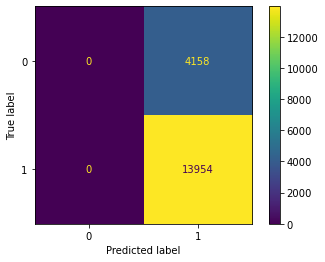

In [18]:
# Instantiate Dummy Classifier 
dummy_model = DummyClassifier()

#Fit and Evaluate Dummy Classifier
dummy_model.fit(X_train_vectorized, y_train)
dummy_yhat = dummy_model.predict(X_train)
plot_confusion_matrix(dummy_model, X_train, y_train);
print(accuracy_score(y_train, dummy_yhat))

We see our Dummy Model predicts our majority label, 1, for each observation. Due to class imbalance, the model performed well at 77% accuracy score.

In [19]:
#testing cross_val function

In [20]:
cross_val(dummy_model, X_train_vectorized, y_train)

{'fit_time': 0.00492,
 'score_time': 0.00628,
 'test_accuracy': 0.77043,
 'test_precision': 0.59356,
 'test_recall': 0.77043,
 'test_f1': 0.67053,
 'test_log_loss': -0.53876}

## Exploring Initial Model CV Results

In [21]:
benchmark = []
# Iterate over all algorithms
for algorithm in [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), XGBClassifier(), RandomForestClassifier()]:
    # Perform cross validation
    results = cross_val_score(algorithm, X_train_vectorized, y_train)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

,0
Algorithm,
MultinomialNB(),0.792237
LogisticRegression(),0.873509
KNeighborsClassifier(),0.813108
DecisionTreeClassifier(),0.781912
"XGBClassifier(base_score=None,",0.861804
RandomForestClassifier(),0.828567


Based on an inital runthough of these algorithms without tuning any model hyperparameters or vectorization paramaeters, Logistic Regression, XGBoost, and Random Forest Classifier are the top 3 performing models. I will explore these models further through grid seraching hyperparameters.

## Logistic Regression

In [22]:
#Instantiating initial Logistic Regression pipeline with no tuning

In [23]:
lr_pipe = Pipeline([
           ('vect', TfidfVectorizer()),
           ('lr', LogisticRegression(random_state=42)),
])

In [24]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('lr', LogisticRegression(random_state=42))])

In [25]:
lr_pipe.score(X_train, y_train)

0.9006183745583038

In [26]:
cross_val(lr_pipe, X_train, y_train)

{'fit_time': 0.45501,
 'score_time': 0.13134,
 'test_accuracy': 0.87401,
 'test_precision': 0.86942,
 'test_recall': 0.87401,
 'test_f1': 0.86637,
 'test_log_loss': -0.29897}

In [27]:
lr_yhat = lr_pipe.predict(X_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


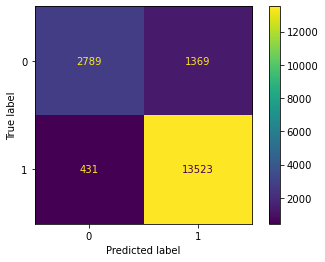

In [28]:
plot_confusion_matrix(lr_pipe, X_train, y_train)

In [29]:
# Show Classification Report
print(classification_report(y_train, lr_yhat))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      4158
           1       0.91      0.97      0.94     13954

    accuracy                           0.90     18112
   macro avg       0.89      0.82      0.85     18112
weighted avg       0.90      0.90      0.90     18112



In [30]:
lr_pipe_sm = ImPipeline([
           ('vect', TfidfVectorizer()),
            ('sm', ADASYN(random_state=42)),
           ('lr', LogisticRegression(random_state=42)),
])


In [31]:
lr_pipe_sm.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('sm', ADASYN(random_state=42)),
                ('lr', LogisticRegression(random_state=42))])

In [32]:
lr_pipe_sm.score(X_train, y_train)

0.8964774734982333

In [33]:
cross_val(lr_pipe_sm, X_train, y_train)

{'fit_time': 3.39142,
 'score_time': 0.12705,
 'test_accuracy': 0.85921,
 'test_precision': 0.87594,
 'test_recall': 0.85921,
 'test_f1': 0.86433,
 'test_log_loss': -0.34022}

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


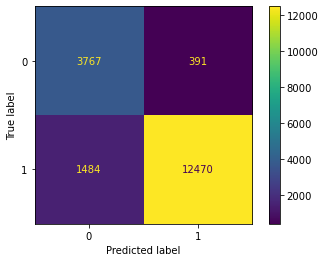

In [34]:
plot_confusion_matrix(lr_pipe_sm, X_train, y_train)

In [35]:
#increasing in precision, decreasing in accuracy; will continue to model without any over sampling techniques as I am not sure if my text data is a good fit for over sampling

### Tuning LR Hyperparameters

In [36]:
#setting up grid to perform grid serach to tune hyperparameters

In [37]:
lr_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000, 2000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [38]:
# set up GridSearchCV object
grid_lr = GridSearchCV(lr_pipe, param_grid=lr_params, cv=5, verbose=3)

In [39]:
# fit our grid object for Logistic Regression to the training data
#grid_lr.fit(X_train, y_train)

In [40]:
#best_parameters = grid_lr.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.5
- vect__max_features: 2000
- Training Accuracy: 89.54%
- [0.66329966 0.96459796]

In [41]:
#improved training accuracy! Let's see if we can improve it further. Our max_df came in at the lowest parameter, so I will lower further. Max features came in at highest parameter so will try higher parameters.

In [42]:
lr2_params = {
    'vect__max_df': (0.4, 0.5, .6),
    'vect__max_features': (2000, 2250, 2500, 3000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('none', 'l1', 'l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [43]:
grid_lr2 = GridSearchCV(lr_pipe, param_grid=lr2_params, cv=5, verbose=3, n_jobs=-2)

In [44]:
#grid_lr2.fit(X_train, y_train)

In [45]:
#best_parameters = grid_lr2.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr2.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'lbfgs'
- vect__max_df: 0.4
- vect__max_features: 3000
- Training Accuracy: 89.84%
- [0.66738817 0.96724953]

In [46]:
#maxed out max_features again and hit minimum max_df; adding in n_gram_range to search for unigrams and bigrams

In [47]:
lr2_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=3000)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='lbfgs', penalty='l2')),
])

In [48]:
lr2_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.4, max_features=3000)),
                ('lr', LogisticRegression(random_state=42))])

In [49]:
lr2_pipe.score(X_train, y_train)

0.8984098939929329

In [50]:
cross_val(lr2_pipe, X_train, y_train)

{'fit_time': 0.40472,
 'score_time': 0.13763,
 'test_accuracy': 0.87594,
 'test_precision': 0.87151,
 'test_recall': 0.87594,
 'test_f1': 0.8687,
 'test_log_loss': -0.29704}

In [51]:
lr3_params = {
    'vect__max_df': (.25, .3, .4, .45),
    'vect__max_features': (2500, 2750, 3000, 3200),
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [52]:
grid_lr3 = GridSearchCV(lr_pipe, param_grid=lr3_params, cv=5, verbose=3, n_jobs=-2)

In [53]:
#grid_lr3.fit(X_train, y_train)

In [54]:
#best_parameters = grid_lr3.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr3.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'lbfgs'
- vect__max_df: 0.4
- vect__max_features: 3000
- vect__ngram_range: (1, 1)
- Training Accuracy: 89.84%
- [0.66738817 0.96724953]

In [55]:
#same results as lr2_pipe since ngram_range(1,1) is default and the only parameter that changed

In [56]:
lr4_params = {
    'vect__max_df': (.35, .4, .45),
    'vect__max_features': (2800, 2900, 3000, 3100),
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [57]:
grid_lr4 = GridSearchCV(lr_pipe, param_grid=lr4_params, cv=5, verbose=3, n_jobs=-2)

In [58]:
#grid_lr4.fit(X_train, y_train)

In [59]:
#best_parameters = grid_lr4.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr4.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.4
- vect__max_features: 2800
- vect__ngram_range: (1, 1)
- Training Accuracy: 89.8%
- [0.66642617 0.96696288]

In [60]:
lr4_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=2800)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', penalty='l2')),
])

In [61]:
lr4_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.4, max_features=2800)),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [62]:
lr4_pipe.score(X_train, y_train)

0.8979681978798587

In [63]:
cross_val(lr4_pipe, X_train, y_train)

{'fit_time': 0.34119,
 'score_time': 0.13846,
 'test_accuracy': 0.87621,
 'test_precision': 0.8718,
 'test_recall': 0.87621,
 'test_f1': 0.86905,
 'test_log_loss': -0.29686}

In [64]:
#best accuracy so far

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


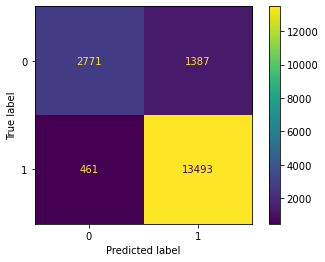

In [65]:
plot_confusion_matrix(lr4_pipe, X_train, y_train);

In [66]:
#comparing with ngram_range of (1,2) for inspection

In [67]:
lr5_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=2800, ngram_range=(1,2))),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', penalty='l2')),
])

In [68]:
lr5_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.4, max_features=2800,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [69]:
cross_val(lr5_pipe, X_train, y_train)

{'fit_time': 1.08067,
 'score_time': 0.27242,
 'test_accuracy': 0.87544,
 'test_precision': 0.871,
 'test_recall': 0.87544,
 'test_f1': 0.86811,
 'test_log_loss': -0.29502}

In [70]:
lr6_params = {
    'vect__max_df': [.35, .4, .45],
    'vect__max_features': [2800, 2900, 3000, 3100],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__solver': ['lbfgs', 'saga', 'liblinear'],
    'lr__penalty': ['l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__C': [.01, 1, 10]
    }

In [71]:
grid_lr6 = GridSearchCV(lr_pipe, param_grid=lr6_params, cv=5, verbose=3, n_jobs=-3)

In [72]:
#grid_lr6.fit(X_train, y_train)

In [73]:
#best_parameters = grid_lr6.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr6.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__C: 1
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.4
- vect__max_features: 2800
- vect__ngram_range: (1, 1)
- Training Accuracy: 89.8%
- [0.66642617 0.96696288]

In [74]:
#may have to increase max_iter due to data failures with grid search

In [75]:
lr7_params = {
    'vect__max_df': [.35, .4, .45],
    'vect__max_features': [2700, 2800, 2900],
    'vect__ngram_range': [(1,1), (1,2)],
    'lr__solver': ['lbfgs', 'saga'],
    'lr__class_weight': [None, 'balanced'],
    'lr__C': [.5, 1, 2],
    'lr__max_iter': [100, 500, 1000]
    }

In [76]:
grid_lr7 = GridSearchCV(lr_pipe, param_grid=lr7_params, cv=5, verbose=3, n_jobs=-3)

In [77]:
#grid_lr7.fit(X_train, y_train)

In [78]:
#best_parameters = grid_lr7.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr7.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__C: 2
- lr__class_weight: None
- lr__max_iter: 100
- lr__solver: 'saga'
- vect__max_df: 0.35
- vect__max_features: 2900
- vect__ngram_range: (1, 1)
- Training Accuracy: 90.79%
- [0.71476671 0.96545793]

In [79]:
lr7_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.35, max_features=2900)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', C=2, max_iter=100)),
])

In [80]:
lr7_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.35, max_features=2900)),
                ('lr',
                 LogisticRegression(C=2, random_state=42, solver='saga'))])

In [81]:
cross_val(lr7_pipe, X_train, y_train)

{'fit_time': 0.34629,
 'score_time': 0.14374,
 'test_accuracy': 0.8771,
 'test_precision': 0.87247,
 'test_recall': 0.8771,
 'test_f1': 0.87179,
 'test_log_loss': -0.28964}

In [82]:
#best accuracy so far!; maxed out on vect_max_features and lr_C and hit minimum of lr_max_iter so will change range

In [83]:
lr8_params = {
    'vect__max_df': [.3, .35, .4],
    'vect__max_features': [2800, 2900, 3000],
    'vect__ngram_range': [(1,1), (1,2)],
    'lr__solver': ['lbfgs', 'saga'],
    'lr__class_weight': [None, 'balanced'],
    'lr__C': [2, 3, 5],
    'lr__max_iter': [50, 100, 150]
    }

In [84]:
grid_lr8 = GridSearchCV(lr_pipe, param_grid=lr8_params, cv=5, verbose=3, n_jobs=-3)

In [85]:
#grid_lr8.fit(X_train, y_train)

In [86]:
#best_parameters = grid_lr8.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr8.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__C: 2
- lr__class_weight: None
- lr__max_iter: 50
- lr__solver: 'saga'
- vect__max_df: 0.35
- vect__max_features: 2900
- vect__ngram_range: (1, 1)
- Training Accuracy: 90.79%
- [0.71476671 0.96545793]

In [87]:
lr8_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.35, max_features=2900)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', C=2, max_iter=50)),
])

In [88]:
lr8_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.35, max_features=2900)),
                ('lr',
                 LogisticRegression(C=2, max_iter=50, random_state=42,
                                    solver='saga'))])

In [89]:
cross_val(lr8_pipe, X_train, y_train)

{'fit_time': 0.35102,
 'score_time': 0.13873,
 'test_accuracy': 0.8771,
 'test_precision': 0.87247,
 'test_recall': 0.8771,
 'test_f1': 0.87179,
 'test_log_loss': -0.28964}

In [90]:
#same results as lr7_pipe... need to try to find max_iter between 1 and 50

In [91]:
lr9_params = {
    'vect__max_df': [.3, .35, .4],
    'vect__max_features': [2800, 2900, 3000],
    'vect__ngram_range': [(1,1), (1,2)],
    'lr__solver': ['lbfgs', 'saga'],
    'lr__C': [1, 1.5, 2, 2.5],
    'lr__max_iter': [10, 25, 50]
    }

In [92]:
grid_lr9 = GridSearchCV(lr_pipe, param_grid=lr9_params, cv=5, verbose=3, n_jobs=-3)

In [93]:
#grid_lr9.fit(X_train, y_train)

In [94]:
#best_parameters = grid_lr9.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr9.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__C: 2.5
- lr__max_iter: 25
- lr__solver: 'lbfgs'
- vect__max_df: 0.3
- vect__max_features: 3000
- vect__ngram_range: (1, 2)
- Training Accuracy: 90.59%
- [0.71356421 0.96323635]

In [95]:
lr9_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.3, max_features=3000, ngram_range=(1,2))),
           ('lr', LogisticRegression(random_state=42, solver='lbfgs', C=2.5, max_iter=25)),
])

In [96]:
lr9_pipe.fit(X_train, y_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.3, max_features=3000,
                                 ngram_range=(1, 2))),
                ('lr',
                 LogisticRegression(C=2.5, max_iter=25, random_state=42))])

In [97]:
cross_val(lr9_pipe, X_train, y_train)

{'fit_time': 0.99963,
 'score_time': 0.25781,
 'test_accuracy': 0.87782,
 'test_precision': 0.87333,
 'test_recall': 0.87782,
 'test_f1': 0.87284,
 'test_log_loss': -0.28896}

In [98]:
#improved accuracy by .07%; seem to be. maxing out on accuracy, will perform one last grid search

In [99]:
lr10_params = {
    'vect__max_df': [.3, .35, .4],
    'vect__max_features': [2800, 2900, 3000],
    'vect__ngram_range': [(1,1), (1,2)],
    'lr__solver': ['lbfgs', 'saga'],
    'lr__C': [2, 2.5, 3],
    'lr__max_iter': [20, 25, 30, 40]
    }

In [100]:
grid_lr10 = GridSearchCV(lr_pipe, param_grid=lr10_params, cv=5, verbose=3, n_jobs=-3)

In [101]:
#grid_lr10.fit(X_train, y_train)

In [102]:
#best_parameters = grid_lr10.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr10.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))#
#print(training_recall)

Grid Search found the following optimal parameters: 
- lr__C: 3
- lr__max_iter: 30
- lr__solver: 'lbfgs'
- vect__max_df: 0.35
- vect__max_features: 3000
- vect__ngram_range: (1, 2)
- Training Accuracy: 91.22%
- [0.73184223 0.96595958]

In [103]:
lr10_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.35, max_features=3000, ngram_range=(1,2))),
           ('lr', LogisticRegression(random_state=42, solver='lbfgs', C=3, max_iter=30)),
])

In [104]:
lr10_pipe.fit(X_train, y_train)


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.35, max_features=3000,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression(C=3, max_iter=30, random_state=42))])

In [105]:
cross_val(lr10_pipe, X_train, y_train)

{'fit_time': 1.06647,
 'score_time': 0.26381,
 'test_accuracy': 0.87815,
 'test_precision': 0.87362,
 'test_recall': 0.87815,
 'test_f1': 0.8733,
 'test_log_loss': -0.286}

In [106]:
#best accuracy so far of 87.8%

## XGBoost

In [107]:
# Instantiate our default XGB pipeline
XGB_pipe = ImPipeline(steps=[('vect', TfidfVectorizer()), 
                             ('XGB', XGBClassifier())])

In [108]:
XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [109]:
XGB_pipe.score(X_train, y_train)

0.9439598056537103

In [110]:
cross_val(XGB_pipe, X_train, y_train)

{'fit_time': 7.03627,
 'score_time': 0.17237,
 'test_accuracy': 0.86136,
 'test_precision': 0.85485,
 'test_recall': 0.86136,
 'test_f1': 0.85332,
 'test_log_loss': -0.31619}

### Tuning XGBoost Hyperparameters

In [111]:
# create our massive grid for the grid search parameters
paramsXGB = {
    'XGB__learning_rate': [0.1, 0.2],
    'XGB__max_depth': [5, 10, 15],
    'XGB__min_child_weight': range(1, 8, 2),
    'XGB__gamma': [0, .1, .2],
    'XGB__subsample': [.5, .75, 1],
    'vect__ngram_range': [(1,1), (1,2)],
}

In [112]:
#Fit grid search object to our training data 
grid_XGB = GridSearchCV(XGB_pipe, param_grid=paramsXGB, cv=5, verbose=3, n_jobs=-2)

In [113]:
#grid_XGB.fit(X_train, y_train)

In [114]:
#best_parameters = grid_XGB.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_XGB.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- XGB__gamma: 0.2
- XGB__learning_rate: 0.2
- XGB__max_depth: 10
- XGB__min_child_weight: 5
- XGB__subsample: 0.75
- vect__ngram_range: (1, 2)
- Training Accuracy: 93.32%
- [0.77561328 0.98022073]

In [115]:
#XGB has long fit time, grid searches take extremely long compared to LR and RFC

In [116]:
#need to tune vectorizor max features definetly

In [117]:
# Instantiate our XGB2 pipeline
XGB2_pipe = ImPipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1,2))), 
                             ('XGB', XGBClassifier(gamma=.2, learning_rate=.2, max_depth=10, min_child_weight=5, subsample=.75))])

In [118]:
XGB2_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [119]:
XGB2_pipe.score(X_train, y_train)

0.9332486749116607

In [120]:
cross_val(XGB2_pipe, X_train, y_train)

{'fit_time': 29.20945,
 'score_time': 0.39511,
 'test_accuracy': 0.86942,
 'test_precision': 0.86401,
 'test_recall': 0.86942,
 'test_f1': 0.86421,
 'test_log_loss': -0.30814}

In [121]:
#accuracy of 86.9%, slightly below best LR model

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


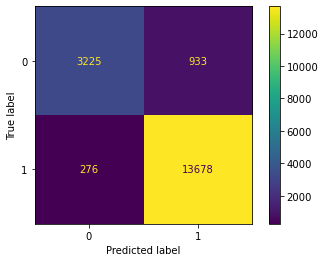

In [122]:
plot_confusion_matrix(XGB2_pipe, X_train, y_train);

Due to the large fit time and over-fittedness of the XGBoost models, I will not be running additional grid searches in this notebook. For further XGBoost grid searches, please refer to my "data_modeling_sentiment_prediction" notebook in the working_notebooks folder.

## Random Forest Classifier

In [123]:
# Create our random forest pipeline to incorporate vectorizer, use default hyperparameters
rfc_pipe = Pipeline(steps=[('vect', TfidfVectorizer()),
                           ('rfc', RandomForestClassifier(random_state=42))])

In [124]:
# Fit our random forest classifier to the training data
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [125]:
# Calculate initial accuracy score of random forest with default hyperparameters
rfc_pipe.score(X_train, y_train)

1.0

In [126]:
#unsurprisingly overfit to accuracy of 1

In [127]:
cross_val(rfc_pipe, X_train, y_train)

{'fit_time': 6.91316,
 'score_time': 0.3636,
 'test_accuracy': 0.83149,
 'test_precision': 0.83496,
 'test_recall': 0.83149,
 'test_f1': 0.80044,
 'test_log_loss': -0.36066}

In [128]:
# create our massive grid for the grid search parameters
params = {'rfc__n_estimators': [75, 100, 150],
           'rfc__max_depth': [50, 100, 150],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [5, 10, 25],
           'rfc__min_impurity_decrease': [0, 0.05],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': [2500, 3000],
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc = GridSearchCV(rfc_pipe, param_grid=params, cv=3, n_jobs=-2, verbose=3)

In [129]:
#grid_rfc.fit(X_train, y_train)

In [130]:
#best_parameters = grid_rfc.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)


Grid Search found the following optimal parameters: 
- rfc__criterion: 'entropy'
- rfc__max_depth: 100
- rfc__max_features: 'sqrt'
- rfc__min_impurity_decrease: 0
- rfc__min_samples_leaf: 5
- rfc__n_estimators: 75
- vect__max_features: 2500
- vect__ngram_range: (1, 2)
- Training Accuracy: 90.06%
- [0.5959596  0.99132865]

In [131]:
#hit lower boundary of  min_samples_leaf and n_estimators and vect_max_features,

In [132]:
# create our massive grid for the grid search parameters
params2 = {'rfc__n_estimators': [70, 75, 80],
           'rfc__max_depth': [75, 100, 125],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [4, 5, 6],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': [2250, 2500, 2750],
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc2 = GridSearchCV(rfc_pipe, param_grid=params2, cv=3, n_jobs=-2, verbose=3)

In [133]:
#grid_rfc2.fit(X_train, y_train)

In [134]:
#best_parameters = grid_rfc2.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc2.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- rfc__criterion: 'entropy'
- rfc__max_depth: 125
- rfc__max_features: 'sqrt'
- rfc__min_samples_leaf: 4
- rfc__n_estimators: 75
- vect__max_features: 2250
- vect__ngram_range: (1, 2)
- Training Accuracy: 92.19%
- [0.68302068 0.99304859]

In [135]:
rfc_pipe2 = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2250, ngram_range=(1,2))),
                           ('rfc', RandomForestClassifier(random_state=42, criterion='entropy', max_depth=125,
                                                         max_features='sqrt', min_samples_leaf=4, n_estimators=75))])

In [136]:
rfc_pipe2.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2250, ngram_range=(1, 2))),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_depth=125,
                                        min_samples_leaf=4, n_estimators=75,
                                        random_state=42))])

In [137]:
rfc_pipe2.score(X_train, y_train)

0.921875

In [138]:
cross_val(rfc_pipe2, X_train, y_train)

{'fit_time': 4.36067,
 'score_time': 0.3455,
 'test_accuracy': 0.84132,
 'test_precision': 0.84094,
 'test_recall': 0.84132,
 'test_f1': 0.8177,
 'test_log_loss': -0.35736}

In [139]:
#still not as good as logistic regression, maxed out max_depth and min of min_samples_leaf

In [140]:
# create our massive grid for the grid search parameters
params3 = {'rfc__n_estimators': [70, 75, 80],
           'rfc__max_depth': [125, 150, 175],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [1, 2, 4],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': [1750, 2000, 2250],
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc3 = GridSearchCV(rfc_pipe, param_grid=params3, cv=3, n_jobs=-2, verbose=3)

In [141]:
#grid_rfc3.fit(X_train, y_train)

In [142]:
#best_parameters = grid_rfc3.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc3.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- rfc__criterion: 'gini'
- rfc__max_depth: 150
- rfc__max_features: 'sqrt'
- rfc__min_samples_leaf: 1
- rfc__n_estimators: 80
- vect__max_features: 2250
- vect__ngram_range: (1, 2)
- Training Accuracy: 99.96%
- [0.998076 1.      ]

In [143]:
rfc_pipe3 = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2250, ngram_range=(1,2))),
                           ('rfc', RandomForestClassifier(random_state=42, criterion='gini', max_depth=150,
                                                         max_features='sqrt', min_samples_leaf=1, n_estimators=80))])

In [144]:
rfc_pipe3.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2250, ngram_range=(1, 2))),
                ('rfc',
                 RandomForestClassifier(max_depth=150, n_estimators=80,
                                        random_state=42))])

In [145]:
rfc_pipe3.score(X_train, y_train)

0.9995583038869258

In [146]:
cross_val(rfc_pipe3, X_train, y_train)

{'fit_time': 6.97666,
 'score_time': 0.40022,
 'test_accuracy': 0.85314,
 'test_precision': 0.84862,
 'test_recall': 0.85314,
 'test_f1': 0.83782,
 'test_log_loss': -0.34316}

In [147]:
#model is extremely overfit with these hyperparameters; still not as good as LR model

As we can see, Random Forests perform very well on our training data, however continue to be overfit and do not perform nearly as well when cross-validating the model. The Logistic Regression models continue to perform better with cross-validation.

# Final Model Evaluation

The best model based on cross validation scores is a Logistic Regression Pipeline with the following hyperparameters tuned:
- For TfidVectorizer: max_df=.35, max_features=3000, ngram_range=(1,2)
- For LogisisticRegression: solver='lbfgs', C=3, max_iter=30

In [148]:
final_model = Pipeline([
           ('vect', TfidfVectorizer(max_df=.35, max_features=3000, ngram_range=(1,2))),
           ('lr', LogisticRegression(random_state=42, solver='lbfgs', C=3, max_iter=30))])

In [149]:
final_model.fit(X_train, y_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.35, max_features=3000,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression(C=3, max_iter=30, random_state=42))])

In [150]:
final_model.score(X_train, y_train)

0.9122128975265018

In [151]:
cross_val(final_model, X_train, y_train)

{'fit_time': 0.9687,
 'score_time': 0.24322,
 'test_accuracy': 0.87815,
 'test_precision': 0.87362,
 'test_recall': 0.87815,
 'test_f1': 0.8733,
 'test_log_loss': -0.286}

In [152]:
final_model.score(X_test, y_test)

0.8827296819787986

In [153]:
#Performing with 88.27% accuracy on unseen data!

We see our final model performs with 91.22% accuracy on training data and 88.27% accuracy on test data.

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


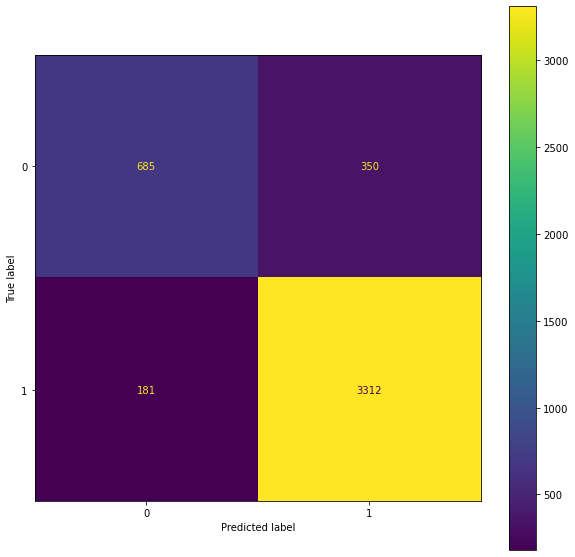

In [154]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(final_model, X_test, y_test, ax=ax)
plt.grid(False)
fig.patch.set_facecolor('white')
plt.savefig("./images/final_confusion_matrix.png", dpi=300, bbox_inches='tight')

The final model using Logistic Regression yielded an accuracy score of 88.27% on unseen data, meaning it correctly classified unseen data as positive or not positive over 88% of the time. The initial Dummy Classifier performed with a 77.04% accuracy, meaning I was able to improve accuracy by over 11% by utilizing and tuning a more complex model. From the confusion matrix, we can see that the model misclassified reviews that were not positive as positive over six times as much as classified reviews that were positive as not positive. This imbalance may be explained by our starting class imbalance. 

In [155]:
#class 1 accuracy
3312/(3312+181)

0.9481820784425995

In [156]:
181/(3312+181)

0.05181792155740052

In [157]:
#class 0 accuracy
685/(685+350)

0.6618357487922706

In [158]:
350/(685+350)

0.33816425120772947

Unsurprisingly, when broken down we see that our Class 1 (positive) reviews are predicted correctly 94.81% of the time, while Class 0 (negative) reviews are predicted correctly 66.18% of the time.

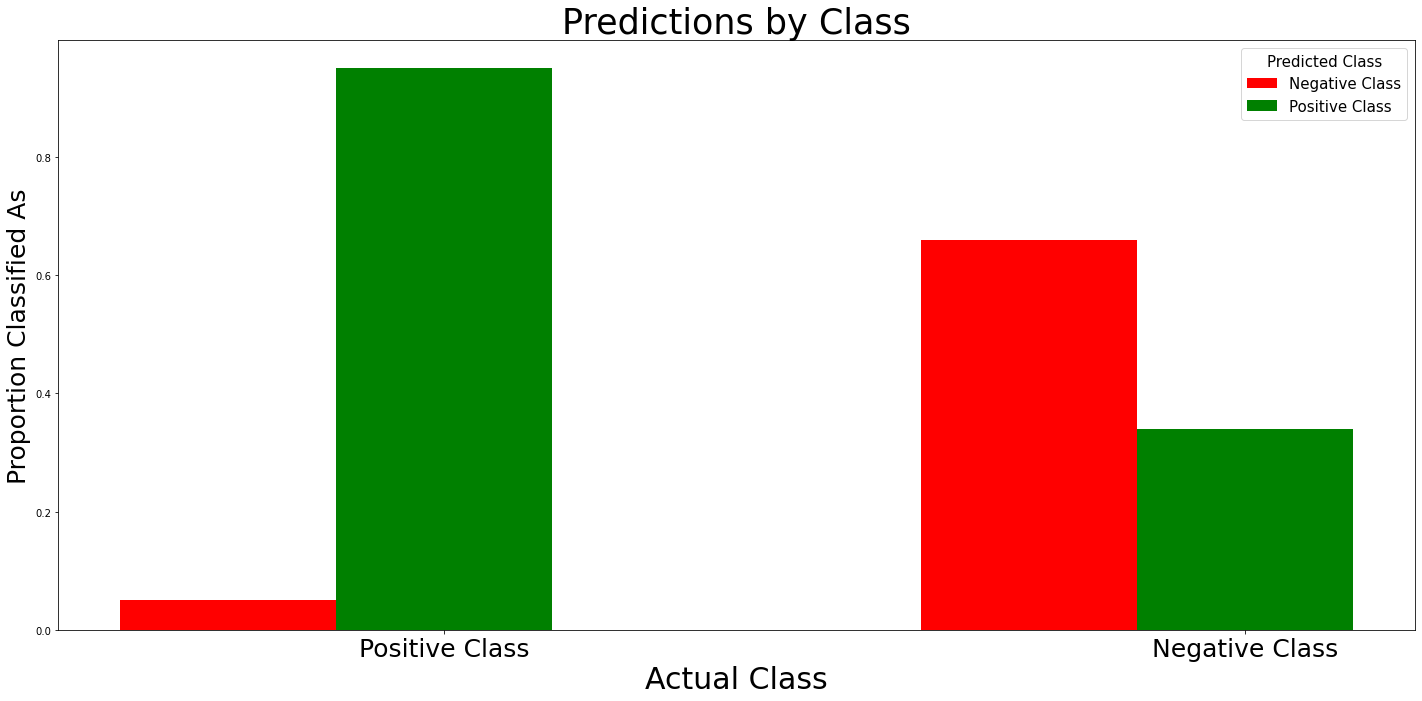

In [159]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars


fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
yvals = [.05, .66]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [.95, .34]
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_title('Predictions by Class', fontsize=35)
ax.set_ylabel('Proportion Classified As', fontsize=25)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Positive Class', 'Negative Class'), fontsize=25 )
ax.set_xlabel('Actual Class', fontsize=30)
ax.legend((rects1[0], rects2[0]), ('Negative Class', 'Positive Class',), title='Predicted Class')
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('./images/class_predictions.png')
plt.show()


### Visualizing Final Model vs. Other Models Performance

The following results are based on the "best" results from each model based on the mean cross-validated training accuracy.

In [160]:
results_dict = {'Dummy Model': .7704, 
                'Random Forest': .8531, 
                'XGBoost': .8614, 
                'Logistic Regression': .8781} 

In [161]:
dict_keys = list(results_dict.keys())
dict_values = list(results_dict.values())

In [162]:
for i, v in enumerate(results_dict):
    print(i, v)

0 Dummy Model
1 Random Forest
2 XGBoost
3 Logistic Regression


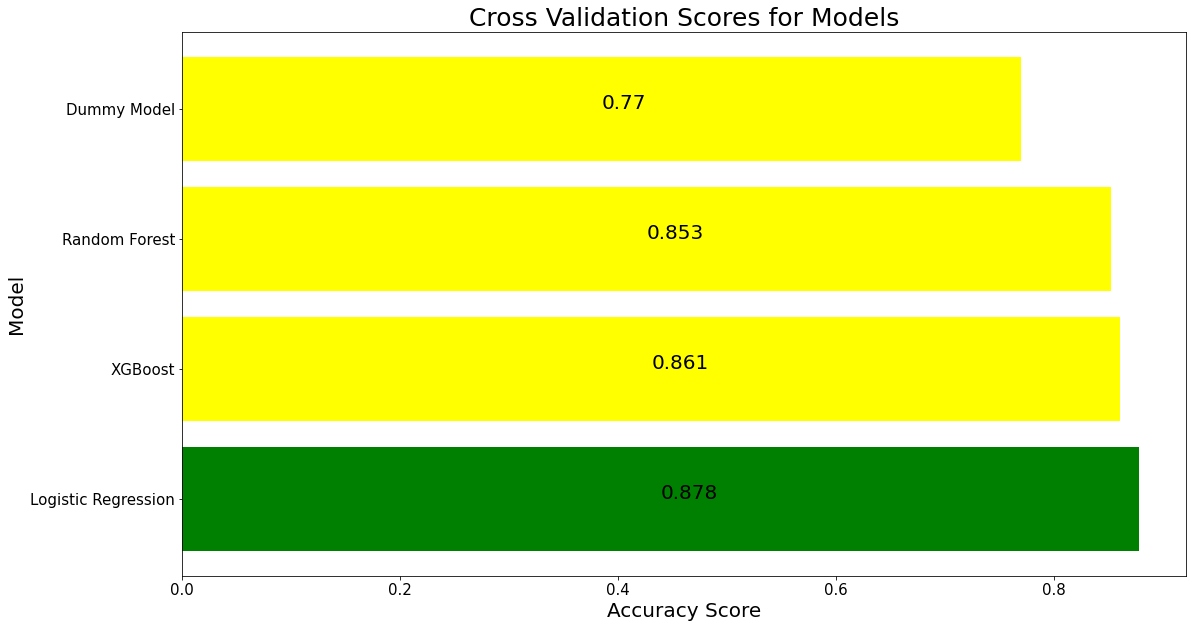

In [163]:

fig, ax = plt.subplots(figsize=(18,10))

ax.barh(dict_keys, dict_values, align='center', color=['yellow', 'yellow', 'yellow', 'green'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Score', fontsize=20)
ax.set_ylabel('Model', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Cross Validation Scores for Models', fontsize=25)
for i, v in enumerate(dict_values):
    ax.text(v/2, i, str(round(v, 3)), color='black', fontsize=20)

fig.patch.set_facecolor('white')
plt.savefig('./images/model_accuracy_scores.png', dpi=400, bbox_inches='tight')

# Limitations

Some limitations effecting my model include:
- Class Imbalance: almost 80% of the reviews were coded as "positive" based on a rating of 4 or 5
- User error when rating items: based on some of the reviews, it appears as though users may have mixed up the ratings and utilized 1 for positive reviews or 5 for negative reviews
    

# Next Steps

Given more time, I would expand this project by:

- Pulling in more data, specifically negative reviews or comments to help better train my model
- Create a dual classification system that first classifys comments as Spam or Not Spam, and then filters out Spam comments and classifies Not Spam as Positive or Negative
- Test my model with other platforms, such as Instagram comments
- Creating a "neutral" target for classification
- Create custom stopwords list, such as removing "not" from stopwords (may be helpful for my model when looking at bigrams)
- Upgrade and deploy an app for brands to utilize to perform Twitter API calls based on user inputted query terms and return a dataframe with one column of tweets and one column of classification

# Conclusion

In conclusion, using my generalizable model will allow women's fashion brand companies to feed comments from any web source to identify positively and negatively sentiment comments and respond appropriately. Utilizing the model will allow companies to save time and by flagging the comments for appropriate teams to respond to, such as Quality Assurance to respond to negative comments, or marketing to respond to and promote positive comments. Responding to these comments appropriately will improve products by identifying potential clothing quality issues if the same sentiment is being repeated, identify potential positive trends, boost visability by responding to comments, and improve brand loyalty by making customers feel heard.